#KNN. Метрики. Линейная регрессия.

# Задание 1. KNN
Сгенерировать наборы данных (см. картинки ниже):

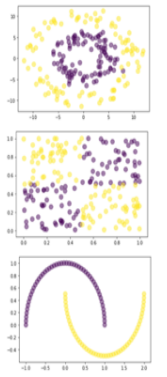

Для каждого набора данных:  
• Обучить и протестировать KNN  
• Построить графики точности (train/test) при разных k (1...8)  
• Построить границы классов  
Подсказка: можно использовать sklearn.datasets  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import warnings
warnings.filterwarnings("ignore")

# KNN Circles


Text(0, 0.5, 'y')

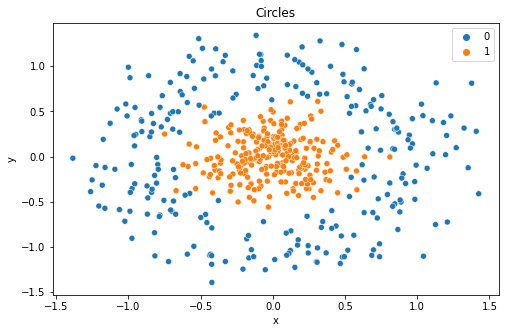

In [ ]:
#генеррируем датасет и формируем график
circles_x,circles_y = ds.make_circles(n_samples=500,factor=0.2,noise=0.2)
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=circles_x, x=circles_x[:,0],y=circles_x[:,1], hue=circles_y)
ax.set_title("Circles")
ax.set_xlabel('x')
ax.set_ylabel('y')


In [ ]:
#разделяем датасет на тестовую и тренировочную выборки
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(circles_x, circles_y, test_size=0.2)

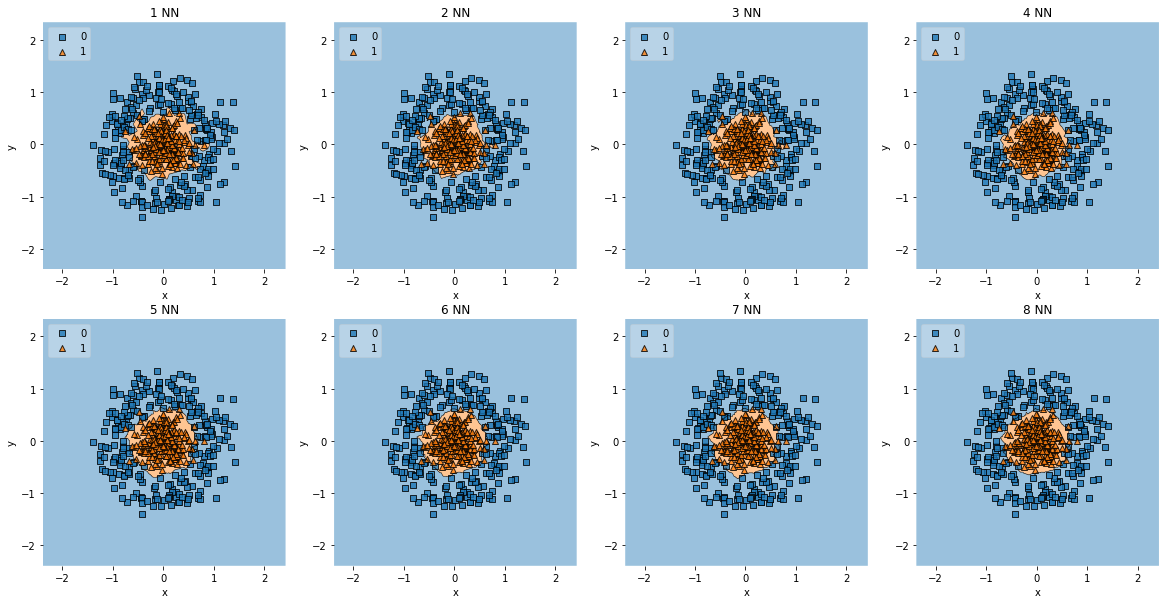

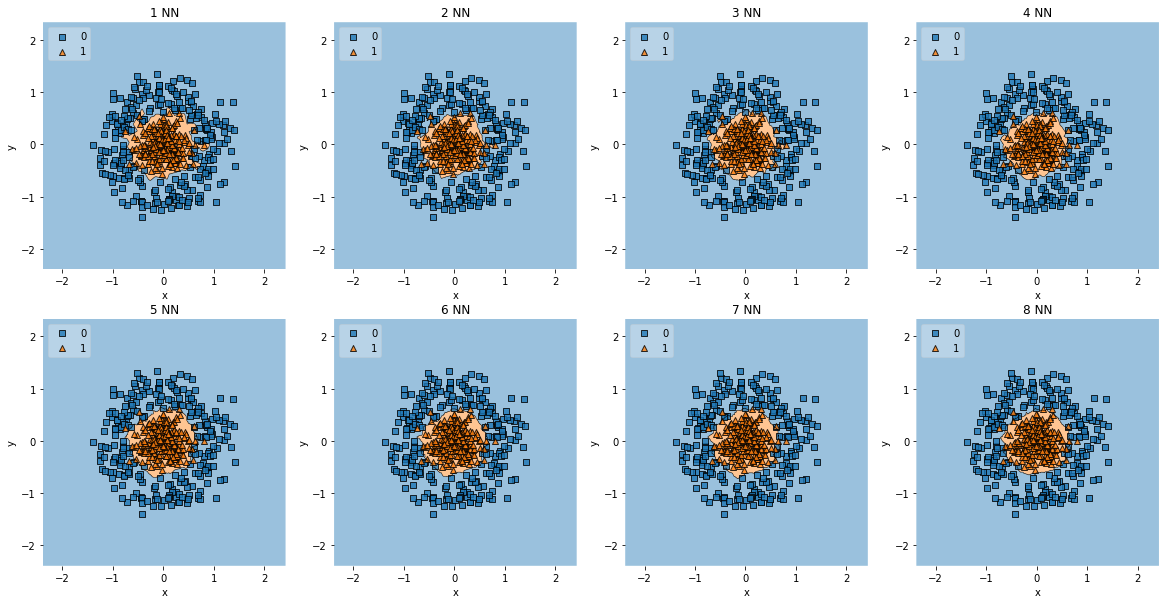

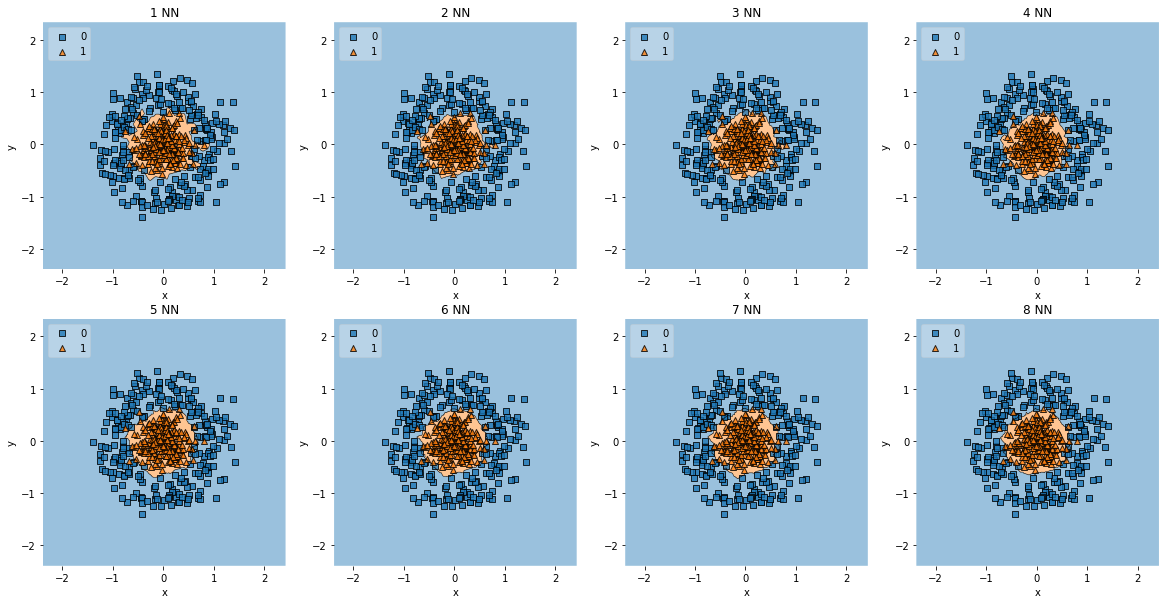

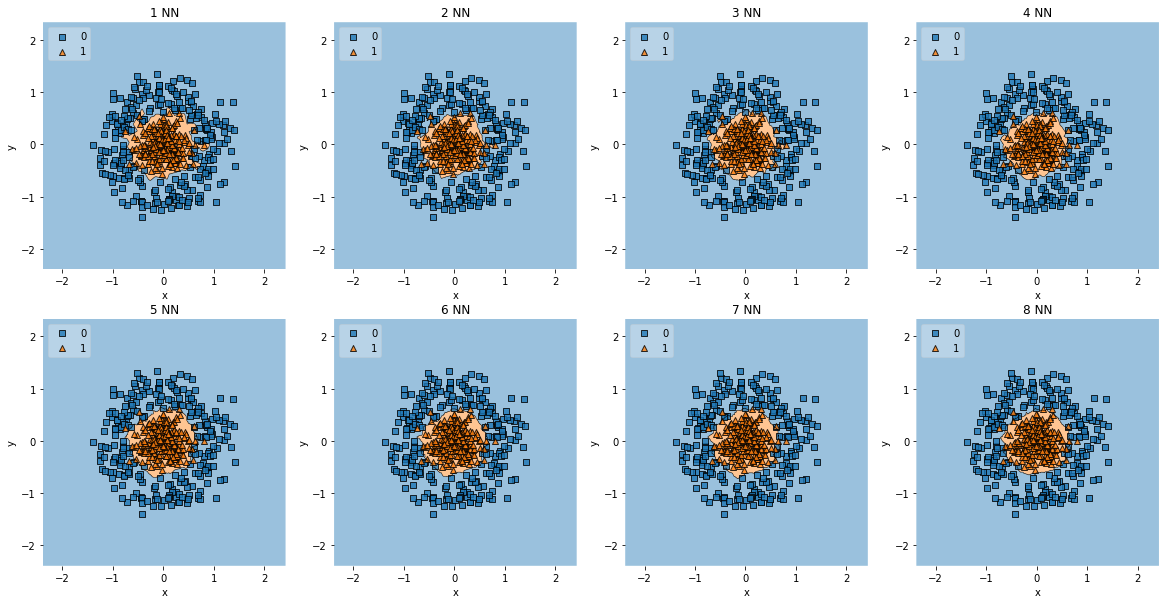

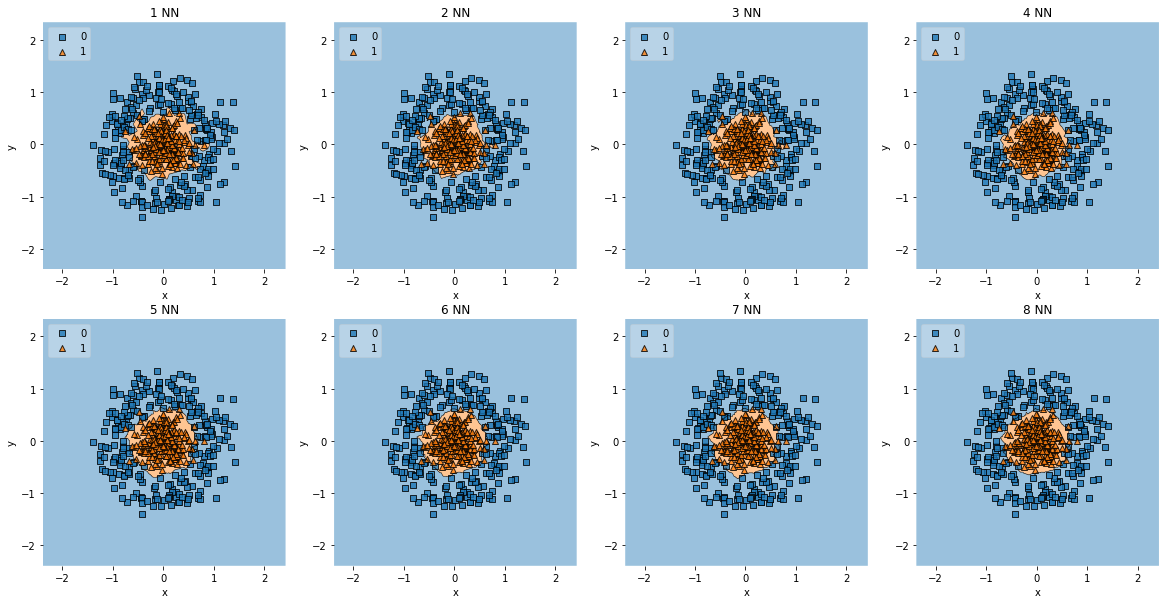

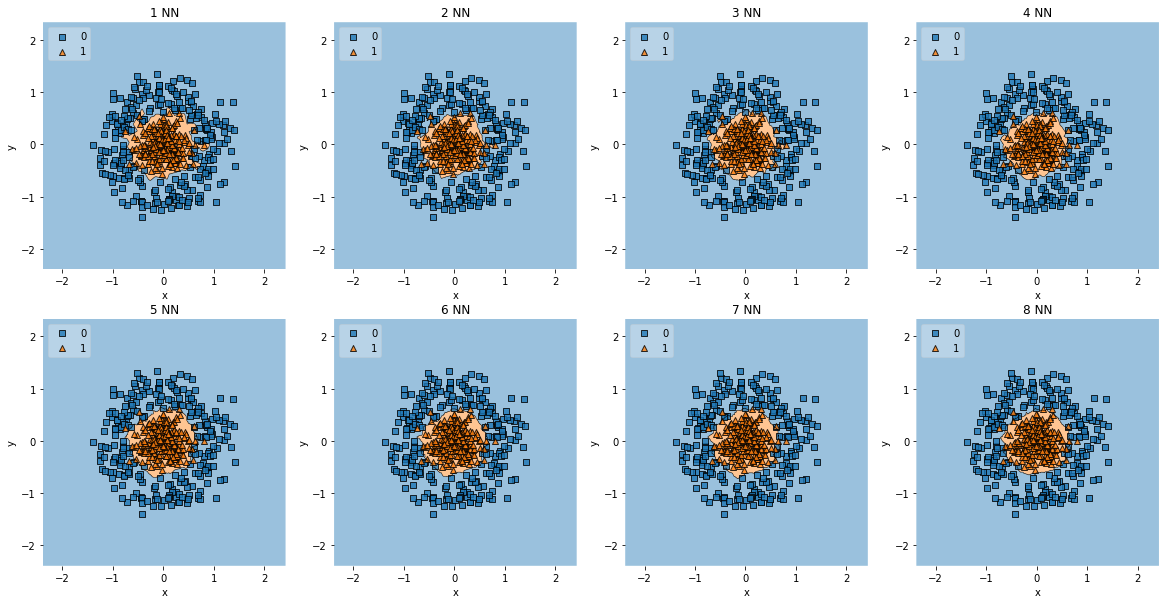

1 loop, best of 5: 4min 53s per loop


In [ ]:
#создаем и обучаем модели
%%timeit
acc_circles_train=[]
acc_circles_test=[]
ns=np.arange(1,9)
gs = gridspec.GridSpec(2, 4)
fig = plt.figure(figsize=(20, 10))

for n, grd in zip(ns,itertools.product(range(2), range(4))):
  score=0.
  #создаем модель с заданным количеством соседей n
  neigh = KNN(n_neighbors=n)
  #предсказываем значения на тестовой выборке
  y_hat_circles = neigh.fit(X_train_circles, y_train_circles).predict(X_test_circles)
  #предсказываем значения на тренировочной выборке
  y_hat_train_circles = neigh.fit(X_train_circles, y_train_circles).predict(X_train_circles)

  #рассчитываем метрику точности
  score_test = np.sum(y_hat_circles==y_test_circles)/len(y_test_circles)
  acc_circles_test.append(score_test)
  score_train = np.sum(y_hat_train_circles==y_train_circles)/len(y_train_circles)
  acc_circles_train.append(score_train)

  #формируем графики границ классов
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=circles_x, y=circles_y, clf=neigh, legend=2)  
  title="{:} NN".format(n)
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
plt.show()

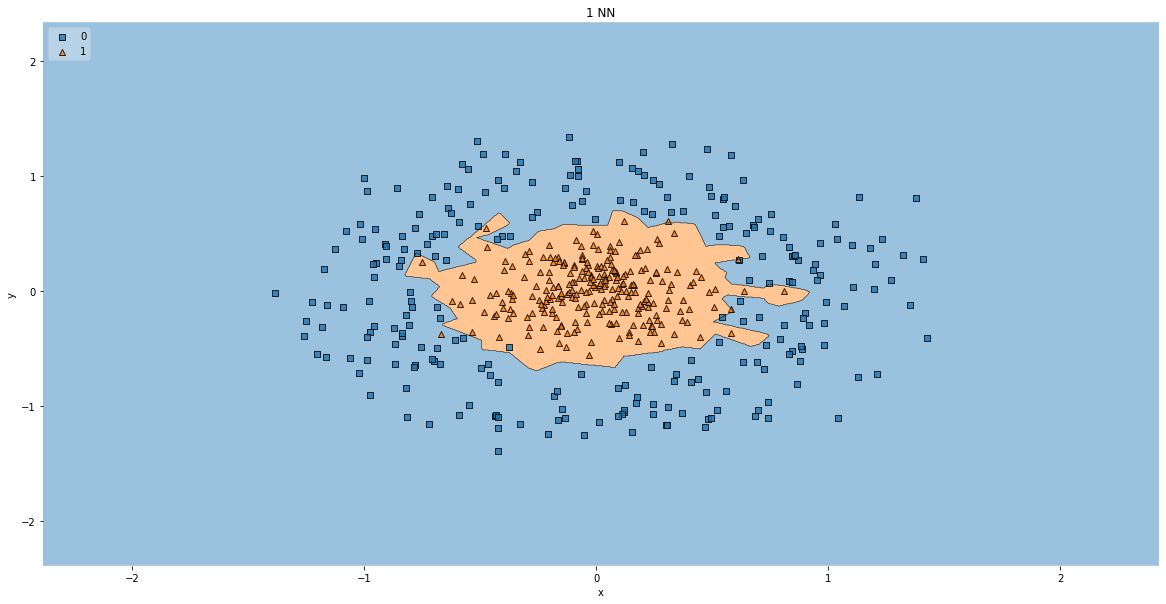

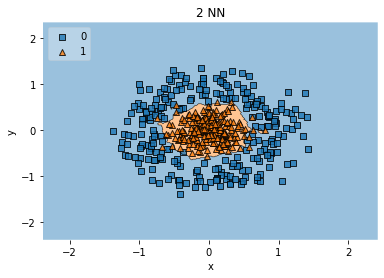

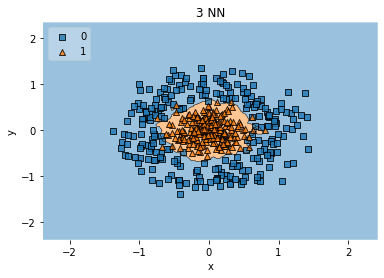

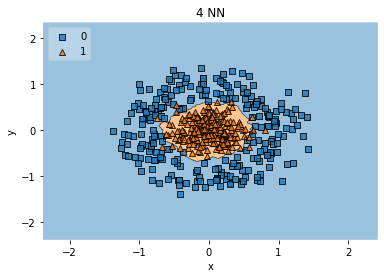

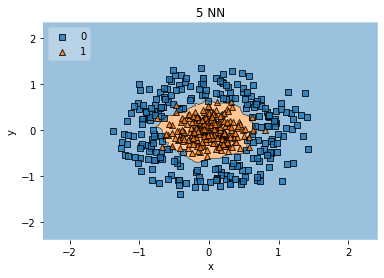

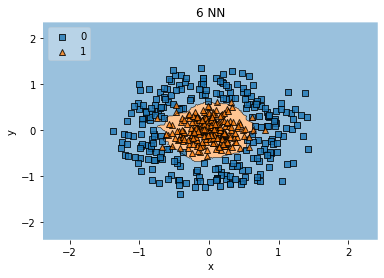

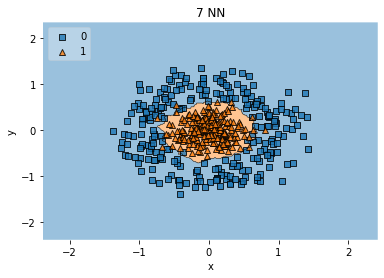

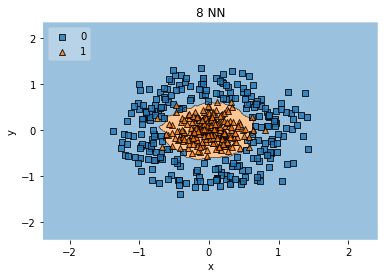

<Figure size 432x288 with 0 Axes>

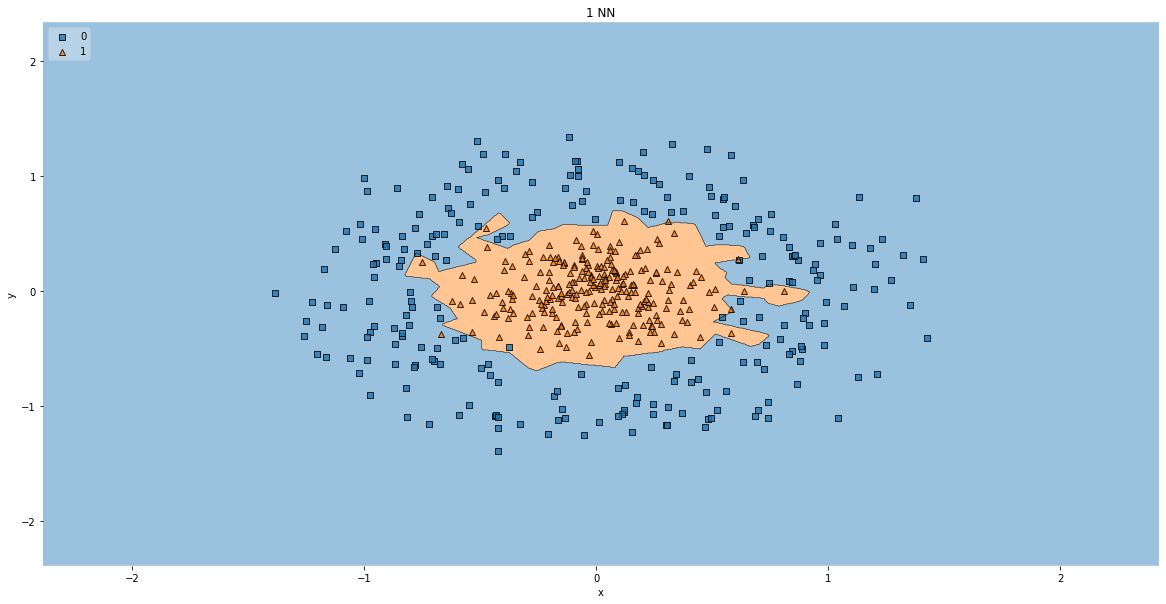

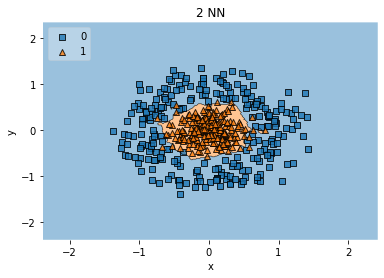

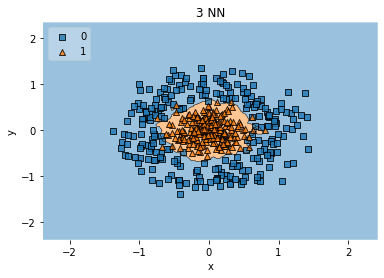

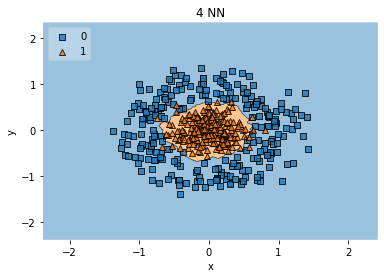

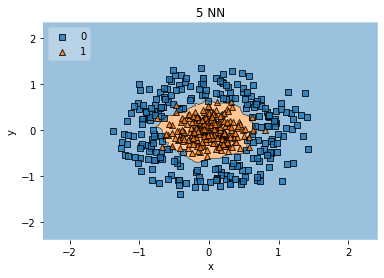

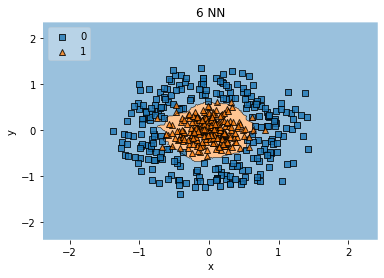

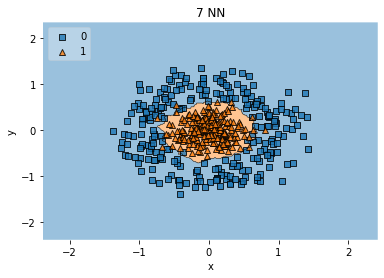

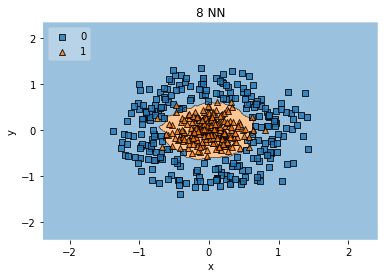

<Figure size 432x288 with 0 Axes>

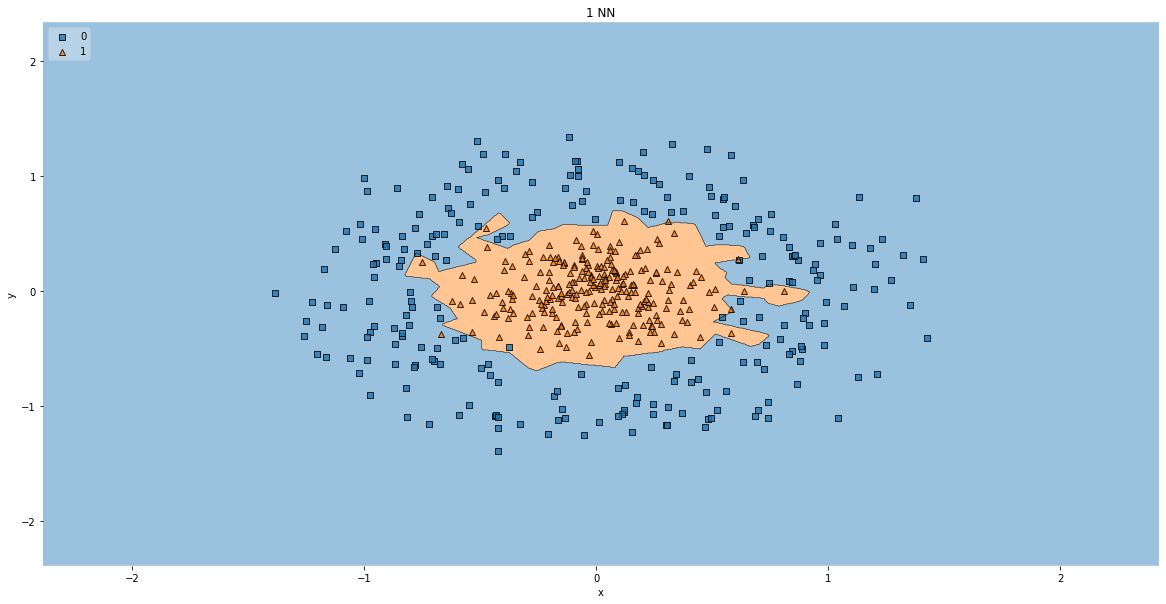

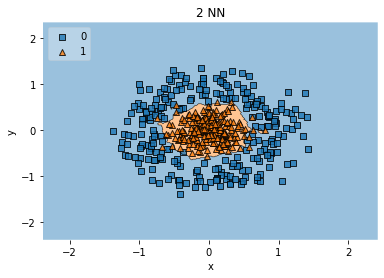

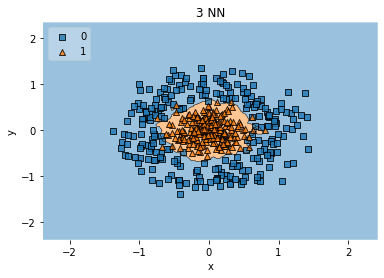

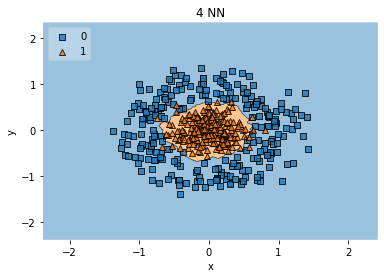

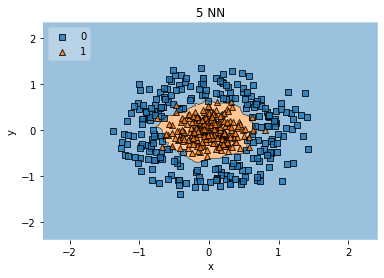

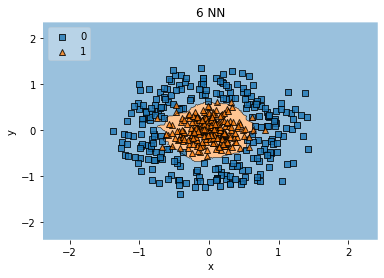

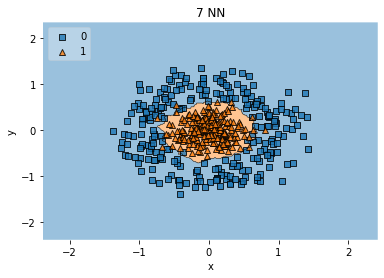

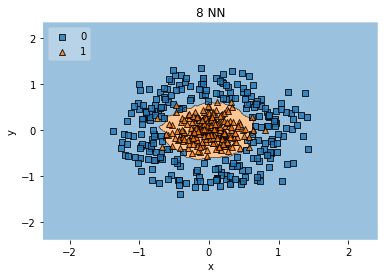

<Figure size 432x288 with 0 Axes>

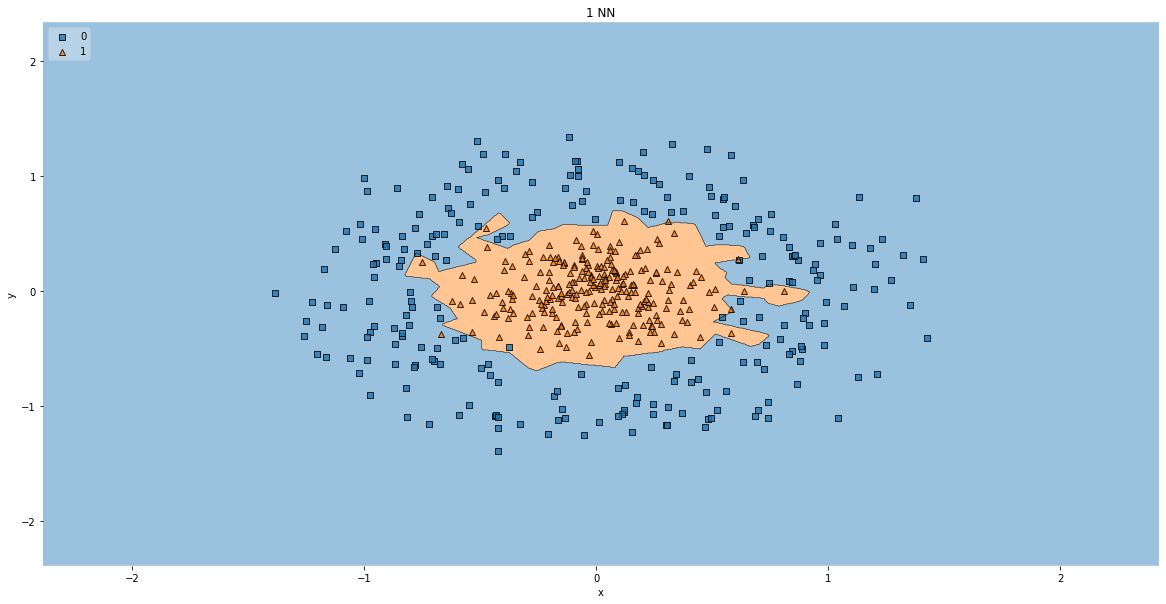

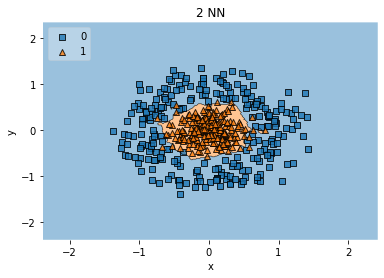

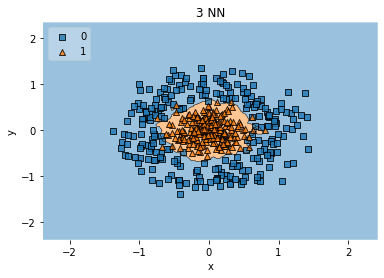

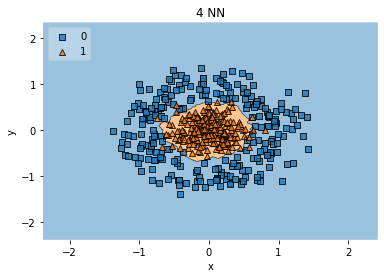

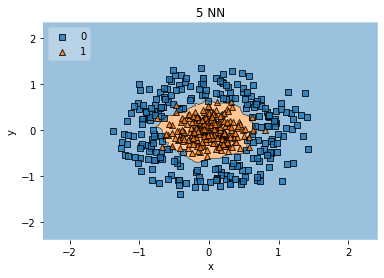

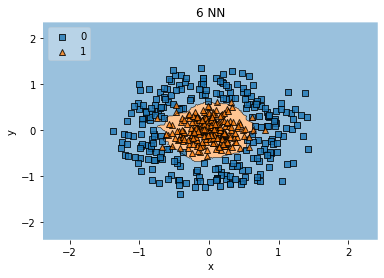

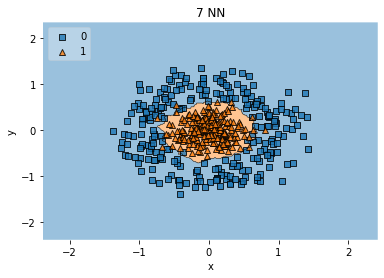

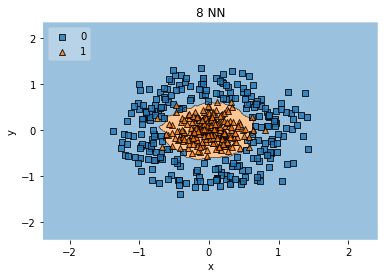

<Figure size 432x288 with 0 Axes>

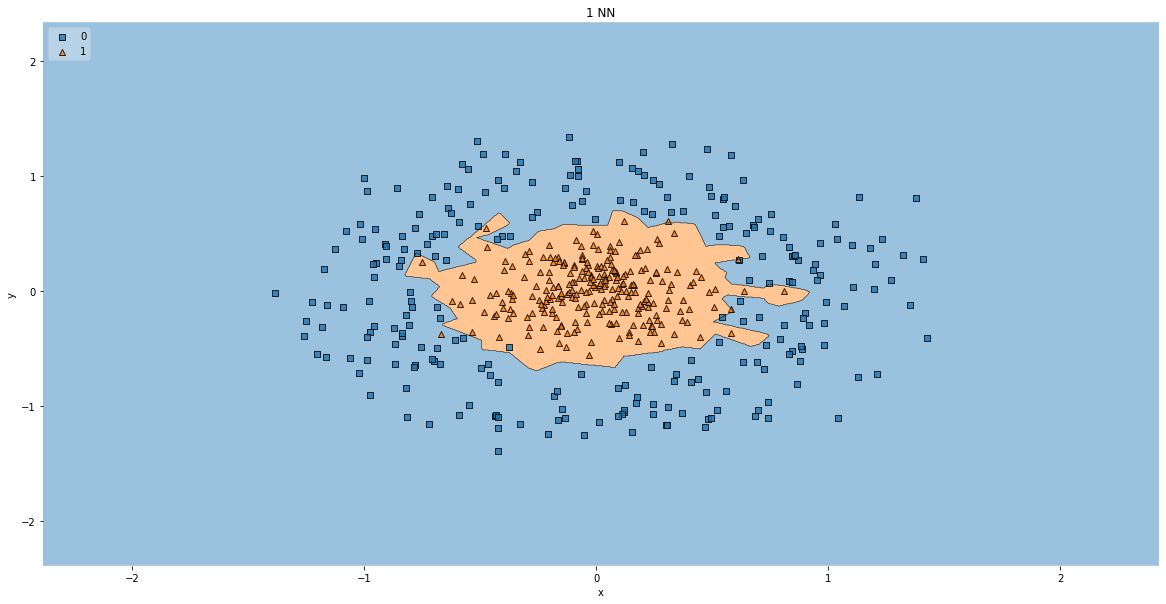

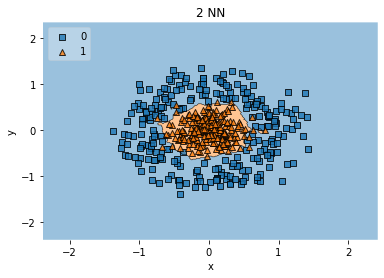

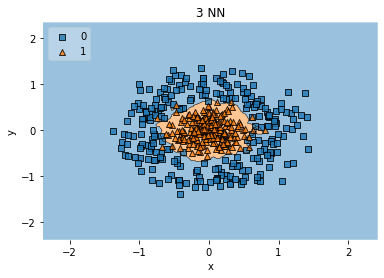

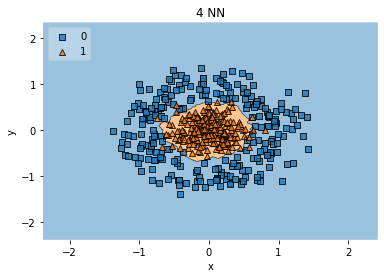

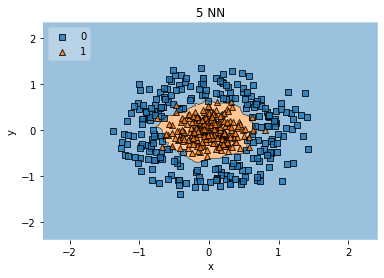

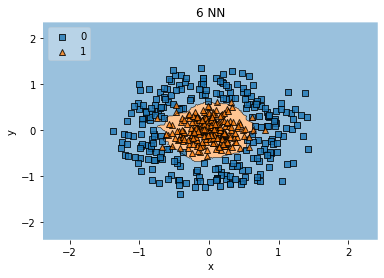

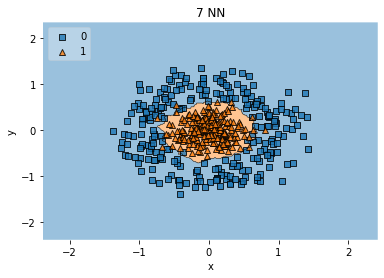

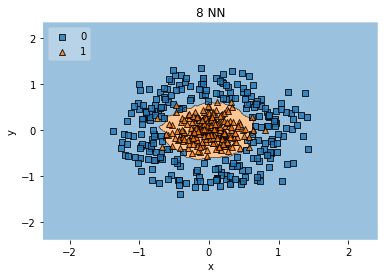

<Figure size 432x288 with 0 Axes>

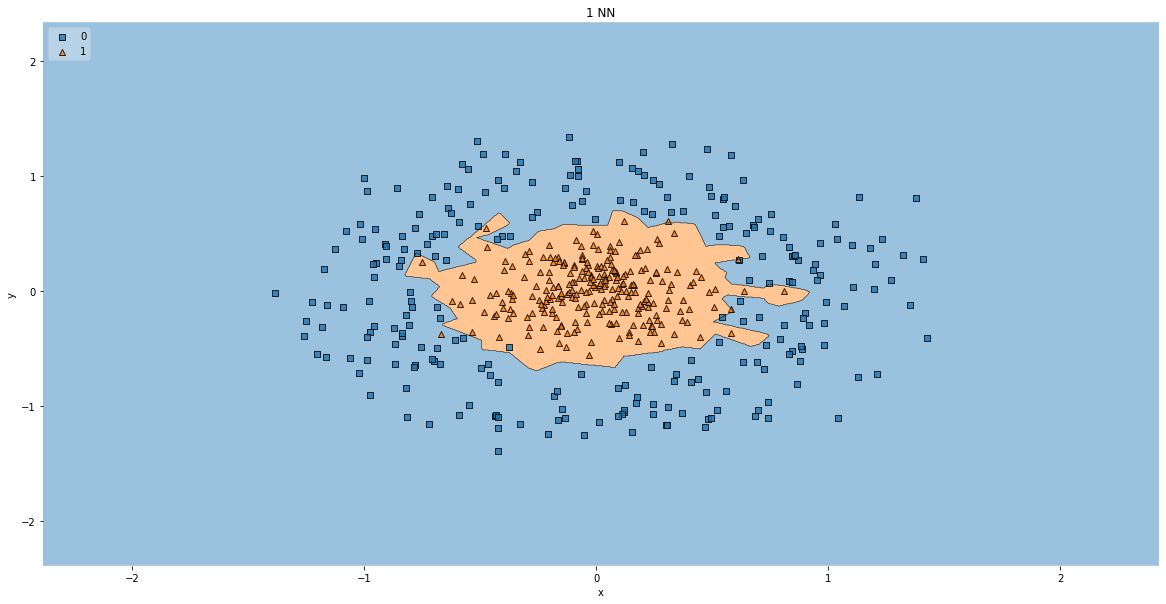

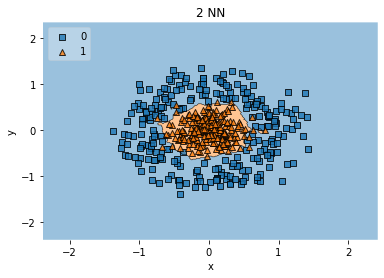

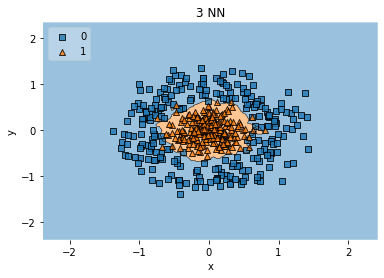

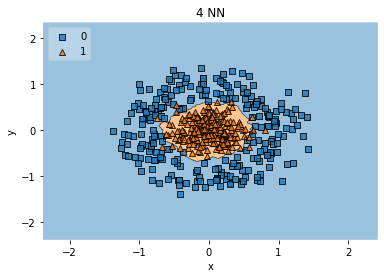

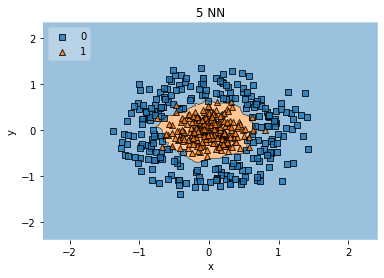

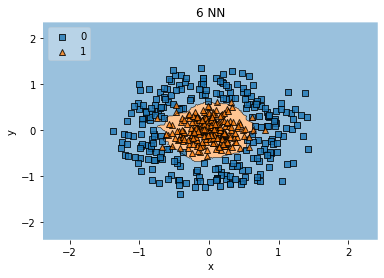

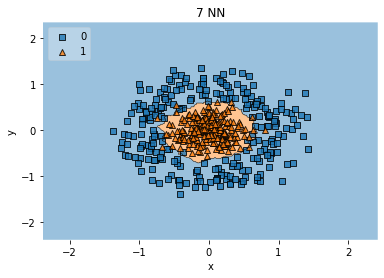

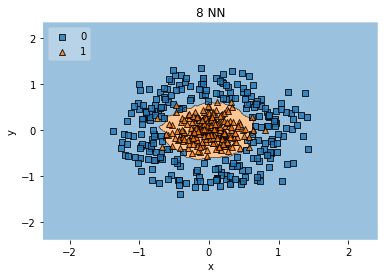

1 loop, best of 5: 1min 7s per loop


<Figure size 432x288 with 0 Axes>

In [ ]:
%%timeit
acc_circles_train=[]
acc_circles_test=[]
ns=np.arange(1,9)

for n in ns:
  score=0.
  #создаем модель с заданным количеством соседей n
  neigh = KNN(n_neighbors=n)
  #предсказываем значения на тестовой выборке
  y_hat_circles = neigh.fit(X_train_circles, y_train_circles).predict(X_test_circles)
  #предсказываем значения на тренировочной выборке
  y_hat_train_circles = neigh.fit(X_train_circles, y_train_circles).predict(X_train_circles)

  #рассчитываем метрику точности
  score_test = np.sum(y_hat_circles==y_test_circles)/len(y_test_circles)
  acc_circles_test.append(score_test)
  score_train = np.sum(y_hat_train_circles==y_train_circles)/len(y_train_circles)
  acc_circles_train.append(score_train)

  #формируем графики границ классов
  ax = plot_decision_regions(X=circles_x, y=circles_y, clf=neigh, legend=2)  
  title="{:} NN".format(n)
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  plt.figure()

In [ ]:
#формируем dataframe для графика точности
df_circles = pd.DataFrame(list(zip(ns,acc_circles_test,acc_circles_train)),
               columns =['n', 'test_accuracy','train_accuracy']).set_index('n', drop=True)

Text(0, 0.5, 'accuracy')

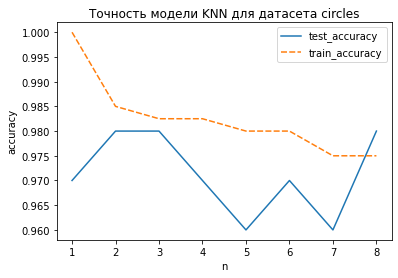

In [ ]:
#отображаем график точности
ax = sns.lineplot(data=df_circles)
ax.legend()
ax.set_title("Точность модели KNN для датасета circles")
ax.set_xlabel('n')
ax.set_ylabel('accuracy')

# KNN Moons

Text(0, 0.5, 'y')

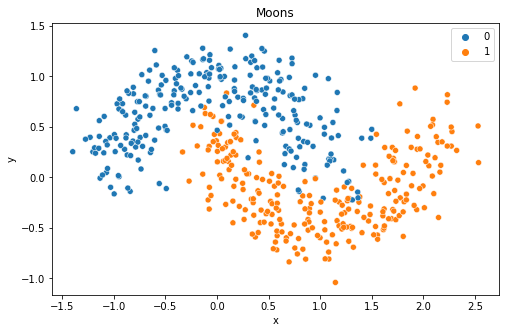

In [ ]:
moons_x, moons_y = ds.make_moons(n_samples=500,noise=0.2)
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=moons_x[:,0],y=moons_x[:,1], hue=moons_y)
ax.set_title("Moons")
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
#разделяем датасет на тестовую и тренировочную выборки
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(moons_x, moons_y, test_size=0.2)

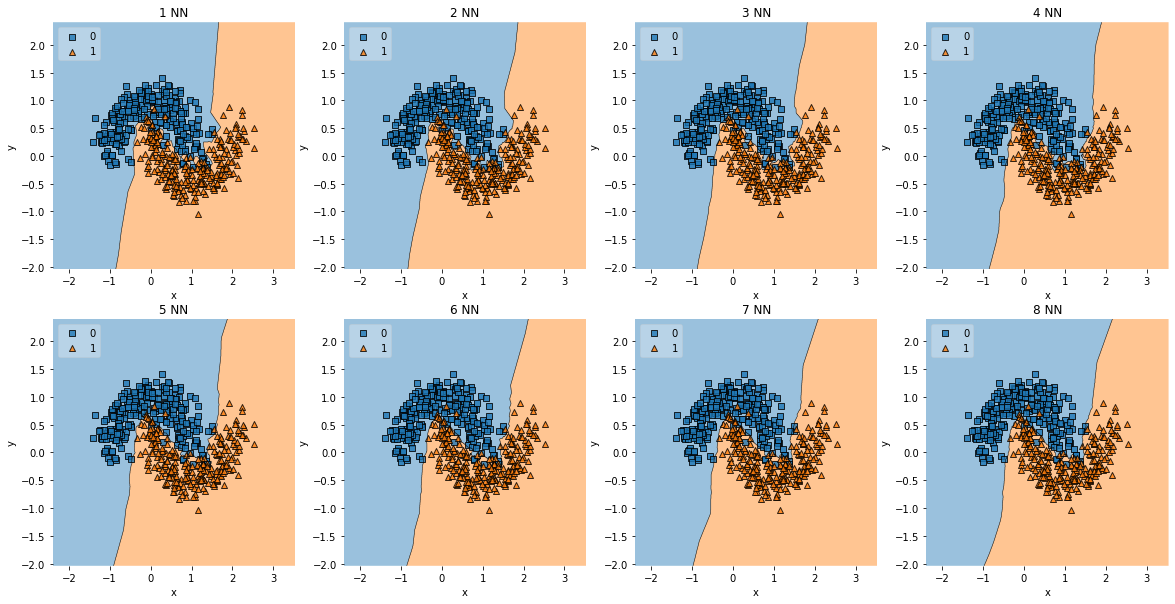

In [ ]:
#создаем и обучаем модели
acc_moons_train=[]
acc_moons_test=[]
gs = gridspec.GridSpec(2, 4)
fig = plt.figure(figsize=(20, 10))

for n, grd in zip(np.arange(1,9),itertools.product(range(2), range(4))):
  score_test=0.
  score_train=0.
  #создаем модель с заданным количеством соседей n
  neigh = KNN(n_neighbors=n)
  #предсказываем значения на тестовой выборке
  y_hat_test_moons = neigh.fit(X_train_moons, y_train_moons).predict(X_test_moons)
  #print(y_hat_test_moons)
  #print(y_test_moons)
  #предсказываем значения на тренировочной выборке
  y_hat_train_moons = neigh.predict(X_train_moons)

  #рассчитываем метрики точности
  score_test = np.sum(y_hat_test_moons==y_test_moons)/len(y_test_moons)
  #print(score_test)
  acc_moons_test.append(score_test)
  score_train = np.sum(y_hat_train_moons==y_train_moons)/len(y_train_moons)
  acc_moons_train.append(score_train)

  #формируем графики границ классов
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=moons_x, y=moons_y, clf=neigh, legend=2)  
  title="{:} NN".format(n)
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
plt.show()

In [ ]:
#формируем dataframe для графика точности
df_moons = pd.DataFrame(list(zip(ns,acc_moons_test,acc_moons_train)),
               columns =['n', 'test_accuracy','train_accuracy']).set_index('n', drop=True)

Text(0, 0.5, 'accuracy')

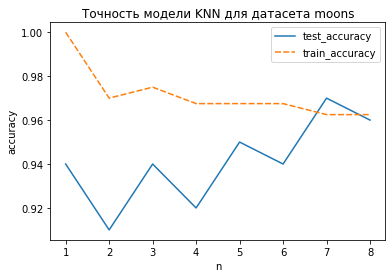

In [ ]:
#отображаем график точности
ax = sns.lineplot(data=df_moons)
ax.legend()
ax.set_title("Точность модели KNN для датасета moons")
ax.set_xlabel('n')
ax.set_ylabel('accuracy')

# KNN random

Text(0, 0.5, 'y')

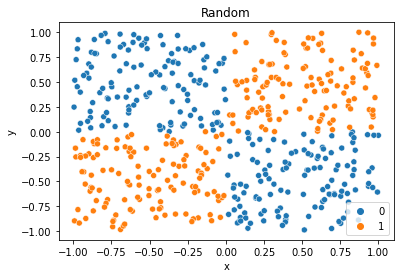

In [ ]:
#генерируем равномерно распределенные точки 2х классов
size=125
x1_class1=np.random.uniform(low=-1., high=0., size=size)
y1_class1=np.random.uniform(low=0., high=1., size=size)

x2_class1=np.random.uniform(low=0., high=1., size=size)
y2_class1=np.random.uniform(low=-1., high=0., size=size)

x1_class2=np.random.uniform(low=-1., high=0., size=size)
y1_class2=np.random.uniform(low=-1., high=0., size=size)

x2_class2=np.random.uniform(low=0., high=1., size=size)
y2_class2=np.random.uniform(low=0., high=1., size=size)

X=np.hstack((x1_class1,x2_class1,x1_class2,x2_class2)).reshape(-1,1)
y=np.hstack((y1_class1,y2_class1,y1_class2,y2_class2)).reshape(-1,1)
Xy=np.hstack((X,y))

cls=np.hstack((np.zeros(size*2),np.ones(size*2))).astype(int)

ax = sns.scatterplot(x=Xy[:,0],y=Xy[:,1], hue=cls)
ax.set_title("Random")
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
#разделяем датасет на тестовую и тренировочную выборки
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(Xy, cls, test_size=0.2)

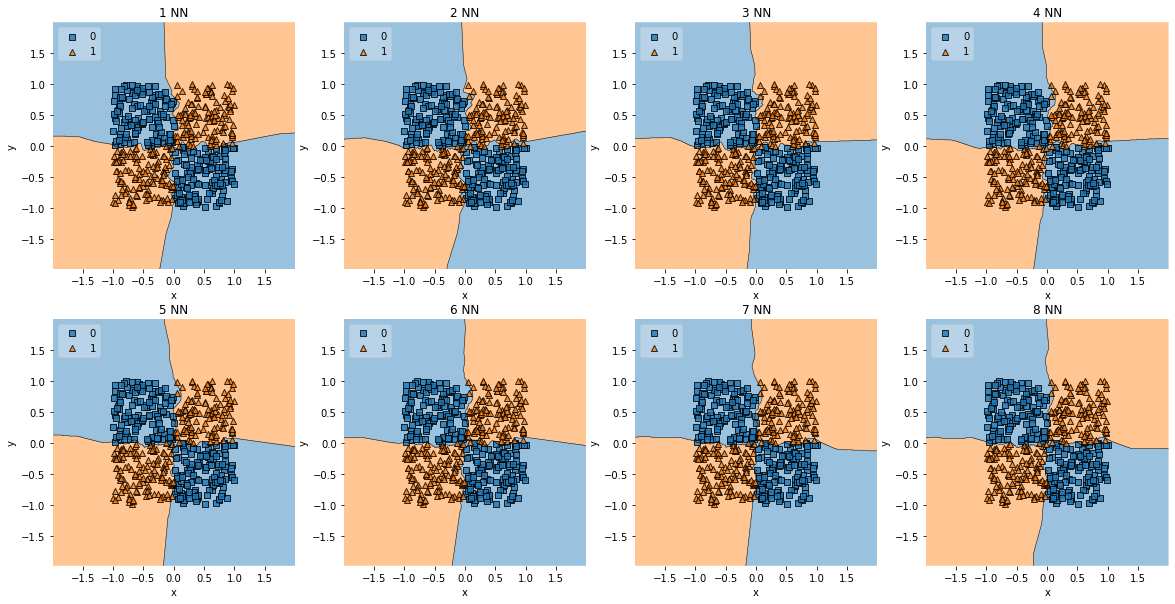

In [ ]:
#создаем и обучаем модели
acc_random_train=[]
acc_random_test=[]
gs = gridspec.GridSpec(2, 4)
fig = plt.figure(figsize=(20, 10))

for n, grd in zip(np.arange(1,9),itertools.product(range(2), range(4))):
  score=0.
  #создаем модель с заданным количеством соседей n
  neigh = KNN(n_neighbors=n)

  #предсказываем значения на тестовой выборке
  y_hat_test_random = neigh.fit(X_train_random, y_train_random).predict(X_test_random)
  #предсказываем значения на тренировочной выборке
  y_hat_train_random = neigh.fit(X_train_random, y_train_random).predict(X_train_random)

  #рассчитываем метрики точности
  score_test = np.sum(y_hat_test_random==y_test_random)/len(y_test_random)
  acc_random_test.append(score_test)
  score_train = np.sum(y_hat_train_random==y_train_random)/len(y_train_random)
  acc_random_train.append(score_train)

  #формируем графики границ классов
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=Xy, y=cls, clf=neigh, legend=2)  
  title="{:} NN".format(n)
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
plt.show()

In [ ]:
#формируем dataframe для графика точности
df_random = pd.DataFrame(list(zip(ns,acc_random_test,acc_random_train)),
               columns =['n', 'test_accuracy','train_accuracy']).set_index('n', drop=True)

Text(0, 0.5, 'accuracy')

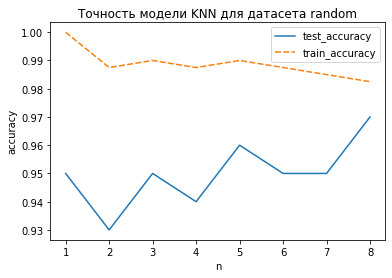

In [ ]:
#отображаем график точности
ax = sns.lineplot(data=df_random)
ax.legend()
ax.set_title("Точность модели KNN для датасета random")
ax.set_xlabel('n')
ax.set_ylabel('accuracy')

# Задание 2. Метрики
25 объектов классифицированы на 3 класса  
C="Cat"  
F="Fish"  
H="Hen"  
истинные значения:  
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]  
результат системы:  
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]  
Написать код на python, который воспроизводит вывод, представленный на картинке
ниже (не используя сторонние библиотеки, кроме numpy):  
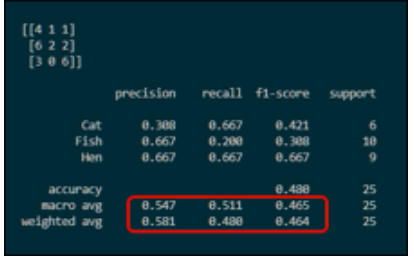

In [ ]:
C="Cat"
F="Fish"
H="Hen"
# истинные значения:
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# результат системы:
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

#преобразуем данные
yt=np.array(y_true)
yp=np.array(y_pred)

In [ ]:
class_count=len(np.unique(yt))
weighted_prec=0
weighted_rec=0
weighted_f1=0
macro_prec=0
macro_rec=0
macro_f1=0

print("{: >25}{: ^30}{: ^10}{: ^30}".format("precision","recall","f1-score","support"))
#рассчитываем метрики для каждого класса
for cl in (C,F,H):
  TP=0
  TN=0
  FP=0
  FN=0
  precision=0
  recall=0
  f1=0
  support=0
  TP=np.sum((yt==cl)&(yp==cl))
  TN=np.sum((yt!=cl)&(yp!=cl))
  FP=np.sum((yt!=cl)&(yp==cl))
  FN=np.sum((yt==cl)&(yp!=cl) ) 
  precision=TP/(TP+FP)
  macro_prec+=precision
  weighted_prec+=precision*np.sum(yt==cl)
  recall=TP/(TP+FN)
  macro_rec+=recall
  weighted_rec+=recall*np.sum(yt==cl)
  f1=2*(recall*precision)/(recall+precision)
  macro_f1+=f1
  weighted_f1+=f1*np.sum(yt==cl)
  support=np.sum(yt==cl)
  print("{:<10}{:^20.3f}{:^20.3f}{:^20.3f}{:>10}".format(cl,precision,recall,f1,support))
print()
#рассчитываем общие метрики
accuracy=np.sum((yt==yp))/len(yt)
print("{:<10}{:>52.3f}{:>18}".format("accuracy",accuracy,len(yt)))
print("{:<10}{:^20.3f}{:^20.3f}{:^20.3f}{:>10}".format("macro_avg",macro_prec/class_count,macro_rec/class_count,macro_f1/class_count, len(yt)))
print("{:<10}{:^16.3f}{:^23.3f}{:^18.3f}{:>11}".format("weighted_avg",weighted_prec/len(yt), weighted_rec/len(yt),weighted_f1/len(yt), len(yt)))

                precision            recall             f1-score            support            
Cat              0.308               0.667               0.421                 6
Fish             0.667               0.200               0.308                10
Hen              0.667               0.667               0.667                 9

accuracy                                                 0.480                25
macro_avg        0.547               0.511               0.465                25
weighted_avg     0.581               0.480               0.464                25


#Задание 3. Линейная регрессия.
1. Самостоятельно выберите / или сгенерируйте набор данных, над которым вы
хотите работать. Он должен быть пригоден для обучения линейной регрессии и
содержать более 3 атрибутов.  
2. Загрузите данные и напишите код, чтобы разбить набор на обучающий и
тестовый наборы данных (с помощью sklearn.model_selection.train_test_split).
Какие переменные вы могли бы использовать для прогнозирования значений
других переменных.  
3. Обучите модель простой линейной регрессии, измерьте точность вашей модели
на тренировочном и тестовом наборе данных. Постройте по одной модели для
нескольких пар (признак-целевая переменная). Какая из моделей дает лучший
R2?  
4. Определите, сколько переменных вам нужно для получения наилучшего
значения R2 в тестовом наборе (добавляйте переменные «жадно» так, чтобы на
каждом шаге после добавления новой переменной ошибка на тренировочном
наборе уменьшалась максимально).  

In [ ]:
#возьмем датасет, отражающий параметры жилья и их стоимость
df = pd.read_csv("https://raw.githubusercontent.com/apetuhova/innopolis/main/homework_3_a_petuhova/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#посмотрим на общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#price=np.array(df['price'])
price=df['price']
#разделяем датасет на тестовую и тренировочную выборки
data_train_all, data_test_all, price_train, price_test = train_test_split(df.drop(columns=['price','id','date']), price, test_size=0.2)

In [ ]:
#отберем признаки, сильнее всего коррелирующие с ценой
data_train_all.corrwith(price_train).sort_values(ascending=False)

sqft_living      0.698187
grade            0.667308
sqft_above       0.602802
sqft_living15    0.587237
bathrooms        0.518143
view             0.403351
sqft_basement    0.312305
lat              0.312160
bedrooms         0.301372
waterfront       0.266811
floors           0.258561
yr_renovated     0.124579
sqft_lot         0.091785
sqft_lot15       0.082729
yr_built         0.056674
condition        0.036750
long             0.021758
zipcode         -0.048502
dtype: float64

In [ ]:
#оставляем наиболее сильно коррелирующие с ценой признаки, за исключением признаков, связанных с площадью (они сильно коррелируют между собой и негативно повлияют на модель)
data_train=data_train_all[['sqft_living', 'grade', 'bathrooms', 'view', 'lat','bedrooms','waterfront','floors','yr_renovated','yr_built','condition']]
data_test=data_test_all[['sqft_living', 'grade', 'bathrooms', 'view', 'lat','bedrooms','waterfront','floors','yr_renovated','yr_built','condition']]

In [ ]:
#обучаем модель
LR=LinearRegression().fit(data_train,price_train)
print("Точность на обучающей выборке: ",r2_score(price_train, LR.predict(data_train)))
print("Точность на тестовой выборке: ",r2_score(price_test, LR.predict(data_test)))

Точность на обучающей выборке:  0.6912893618449245
Точность на тестовой выборке:  0.6953262407155454


In [ ]:
#тестируем модели на основе одного признака
for col in data_train.columns:
  data_pair_test=np.array(data_test_all[col]).reshape(-1,1)
  data_pair_train=np.array(data_train_all[col]).reshape(-1,1)
  #data_train, data_test, price_train, price_test = train_test_split(data_pair, price, test_size=0.2)
  LR=LinearRegression().fit(data_pair_train,price_train)
  print("Точность на обучающей выборке по параметру {:}: {:.6f}".format(col, r2_score(price_train, LR.predict(data_pair_train))))
  print("Точность на тестовой выборке по параметру {:} {:.6f}\n".format(col,r2_score(price_test, LR.predict(data_pair_test))))

Точность на обучающей выборке по параметру sqft_living: 0.487465
Точность на тестовой выборке по параметру sqft_living 0.511301

Точность на обучающей выборке по параметру grade: 0.445299
Точность на тестовой выборке по параметру grade 0.445510

Точность на обучающей выборке по параметру bathrooms: 0.268472
Точность на тестовой выборке по параметру bathrooms 0.300277

Точность на обучающей выборке по параметру view: 0.162692
Точность на тестовой выборке по параметру view 0.140491

Точность на обучающей выборке по параметру lat: 0.097444
Точность на тестовой выборке по параметру lat 0.082639

Точность на обучающей выборке по параметру bedrooms: 0.090825
Точность на тестовой выборке по параметру bedrooms 0.108824

Точность на обучающей выборке по параметру waterfront: 0.071188
Точность на тестовой выборке по параметру waterfront 0.069606

Точность на обучающей выборке по параметру floors: 0.066854
Точность на тестовой выборке по параметру floors 0.062291

Точность на обучающей выборке по

Лучший результат по метрике r2 имеет параметр, наиболее сильно коррелирующий с ценой - sqft_living

In [ ]:
#последовательно добавляем в модель признаки
col_list=[]
for col in data_train.columns:
  col_list.append(col)
  if (len(col_list)==1):
    data_train_add=np.array(data_train[col_list]).reshape(-1,1)
    data_test_add=np.array(data_test[col_list]).reshape(-1,1)
  else:
    data_train_add=np.array(data_train[col_list])
    data_test_add=np.array(data_test[col_list])
  #data_train, data_test, price_train, price_test = train_test_split(data_add, price, test_size=0.2)
  LR=LinearRegression().fit(data_train_add,price_train)
  print("Точность на обучающей выборке по параметрам {:}: {:.6f}".format(col_list, r2_score(price_train, LR.predict(data_train_add))))
  print("Точность на тестовой выборке по параметрам {:} {:.6f}\n".format(col_list,r2_score(price_test, LR.predict(data_test_add))))

Точность на обучающей выборке по параметрам ['sqft_living']: 0.487465
Точность на тестовой выборке по параметрам ['sqft_living'] 0.511301

Точность на обучающей выборке по параметрам ['sqft_living', 'grade']: 0.530388
Точность на тестовой выборке по параметрам ['sqft_living', 'grade'] 0.548327

Точность на обучающей выборке по параметрам ['sqft_living', 'grade', 'bathrooms']: 0.533550
Точность на тестовой выборке по параметрам ['sqft_living', 'grade', 'bathrooms'] 0.549015

Точность на обучающей выборке по параметрам ['sqft_living', 'grade', 'bathrooms', 'view']: 0.571799
Точность на тестовой выборке по параметрам ['sqft_living', 'grade', 'bathrooms', 'view'] 0.581766

Точность на обучающей выборке по параметрам ['sqft_living', 'grade', 'bathrooms', 'view', 'lat']: 0.637312
Точность на тестовой выборке по параметрам ['sqft_living', 'grade', 'bathrooms', 'view', 'lat'] 0.634094

Точность на обучающей выборке по параметрам ['sqft_living', 'grade', 'bathrooms', 'view', 'lat', 'bedrooms']:

Видим, что после добавления 6го признака точность модели начинает возрастать медленнее

In [ ]:
#сформируем модель на основе всех признаков
LR=LinearRegression().fit(data_train_all,price_train)
print("Точность на обучающей выборке: ",r2_score(price_train, LR.predict(data_train_all)))
print("Точность на тестовой выборке: ",r2_score(price_test, LR.predict(data_test_all)))

Точность на обучающей выборке:  0.6990243757866975
Точность на тестовой выборке:  0.7012163424674446


In [ ]:
data_train_all.shape

(17290, 18)

Наибольшей точности модель достигает при использовании всех параметров, но разница между использованием 11 параметров и 18 некритичная.